Problem 2: CART-RF-ANN


An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
df2 = pd.read_csv('insurance_part2_data.csv')

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).


In [3]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
df2.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [6]:
df2.shape

(3000, 10)

In [7]:
df2.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [8]:
df2.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


Univariate Analysis

In [9]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df2[column], kde=True);
    plt.title("Distribution of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column], orient = "v")
    plt.title("Boxplot of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax1 = plt.hist(x=df2[column])
    plt.title("Histogram of " + column,fontsize=10)
    plt.xlabel("" + column, fontsize=10)
    plt.show()

In [10]:
df2_num = df2.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns2 = list(df2_num.columns.values)
len(lstnumericcolumns2)

4

In [11]:
df2_num.head()

,Age,Commision,Duration,Sales
0,48,0.70,7,2.51
1,36,0.00,34,20.00
2,39,5.94,3,9.90
3,36,0.00,4,26.00
4,33,6.30,53,18.00


In [12]:
Skewness_2 = pd.DataFrame({'Skewness' : [stats.skew(df2.Age),stats.skew(df2.Commision),stats.skew(df2.Duration),stats.skew(df2.Sales)]},
                        index=['Age','Commision','Duration','Sales']) 

In [13]:
Skewness_2

,Skewness
Age,1.149138
Commision,3.147283
Duration,13.777788
Sales,2.379958


Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


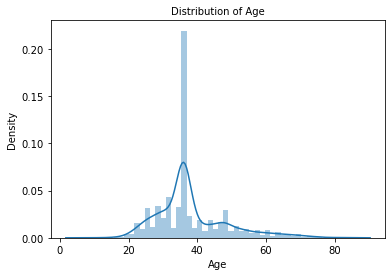

BoxPlot of Age
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


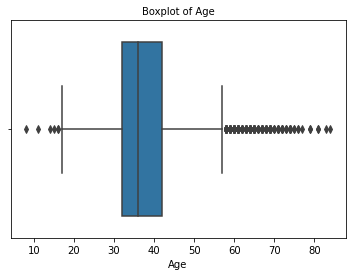

Histogram of Age
----------------------------------------------------------------------------


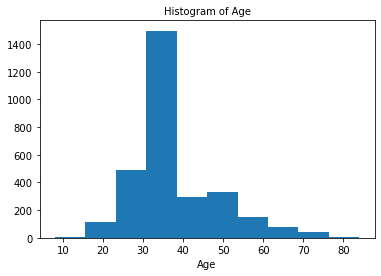

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


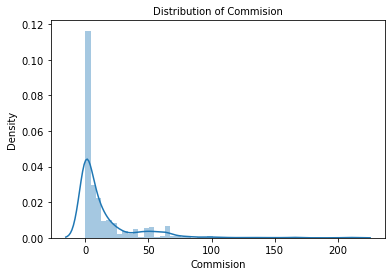

BoxPlot of Commision
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


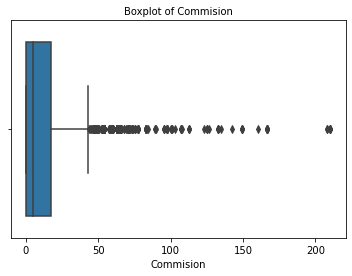

Histogram of Commision
----------------------------------------------------------------------------


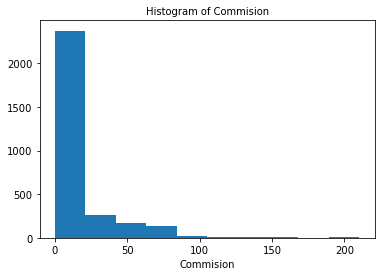

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


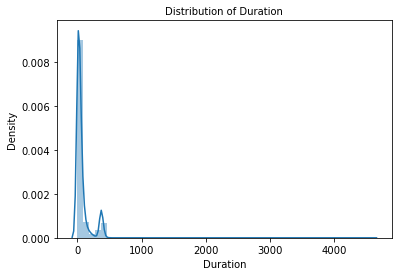

C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


BoxPlot of Duration
----------------------------------------------------------------------------


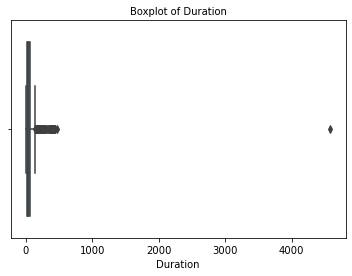

Histogram of Duration
----------------------------------------------------------------------------


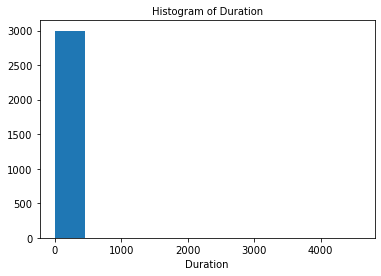

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


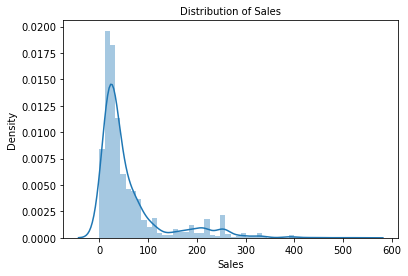

BoxPlot of Sales
----------------------------------------------------------------------------


C:\Users\Athulya\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


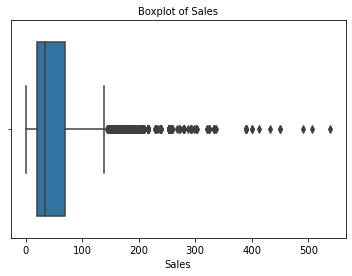

Histogram of Sales
----------------------------------------------------------------------------


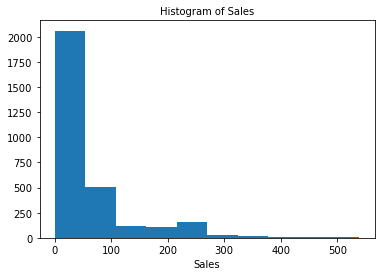

In [14]:
for x in lstnumericcolumns2:
    univariateAnalysis_numeric(x,4)

<AxesSubplot:title={'center':'Countplot of Agency_code'}, xlabel='Agency_Code', ylabel='count'>

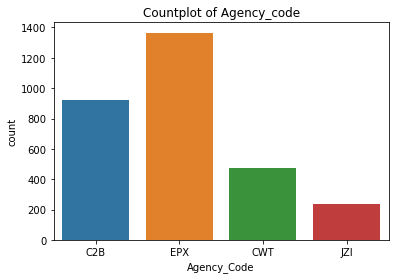

In [15]:
plt.title('Countplot of Agency_code')
sns.countplot(data = df2, x = 'Agency_Code')

<AxesSubplot:title={'center':'Countplot of Type'}, xlabel='Type', ylabel='count'>

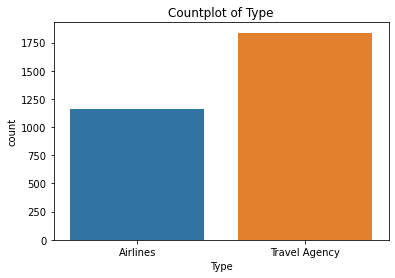

In [16]:
plt.title('Countplot of Type')
sns.countplot(data = df2, x = 'Type')

<AxesSubplot:title={'center':'Countplot of Claimed'}, xlabel='Claimed', ylabel='count'>

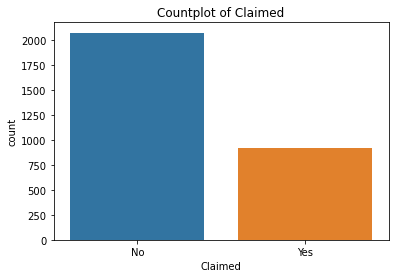

In [17]:
plt.title('Countplot of Claimed')
sns.countplot(data = df2, x = 'Claimed')

<AxesSubplot:title={'center':'Countplot of Channel'}, xlabel='Channel', ylabel='count'>

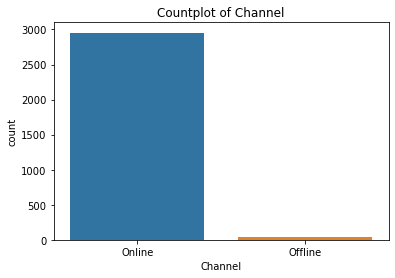

In [18]:
plt.title('Countplot of Channel')
sns.countplot(data = df2, x = 'Channel')

<AxesSubplot:title={'center':'Countplot of Product Name'}, xlabel='Product Name', ylabel='count'>

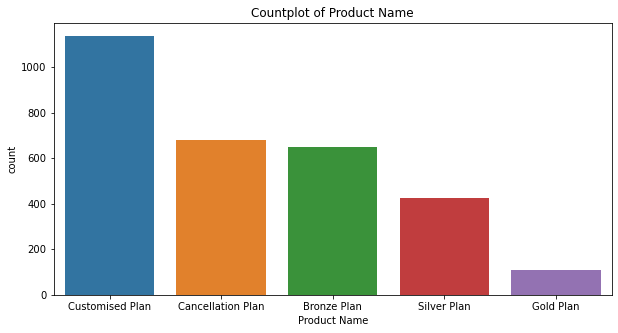

In [19]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Product Name')
sns.countplot(data = df2, x = 'Product Name')

<AxesSubplot:title={'center':'Countplot of Destination'}, xlabel='Destination', ylabel='count'>

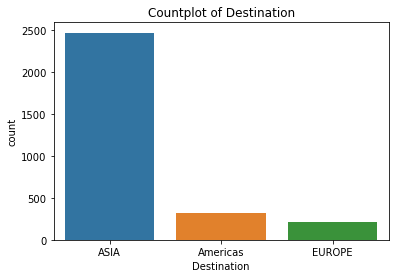

In [20]:
plt.title('Countplot of Destination')
sns.countplot(data = df2, x = 'Destination')

Bivariate Analysis

In [21]:
corr2 = df2_num.corr(method='pearson')
corr2

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


<AxesSubplot:>

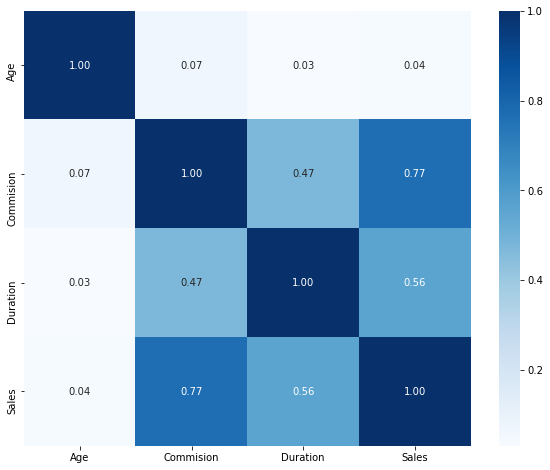

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(corr2, annot=True, fmt = '.2f', cmap = 'Blues')

<AxesSubplot:title={'center':'Countplot of Agency_code'}, xlabel='Agency_Code', ylabel='count'>

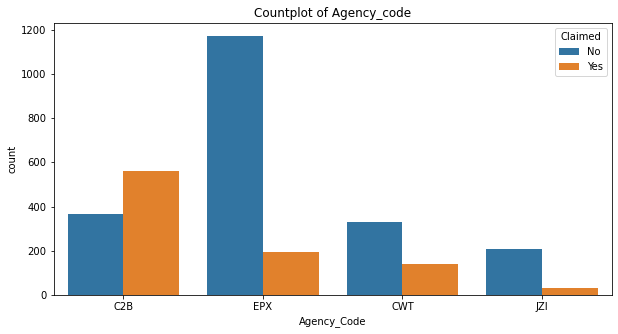

In [23]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Agency_code')
sns.countplot(x='Agency_Code',hue='Claimed',data=df2)

<AxesSubplot:title={'center':'Countplot of Type'}, xlabel='Type', ylabel='count'>

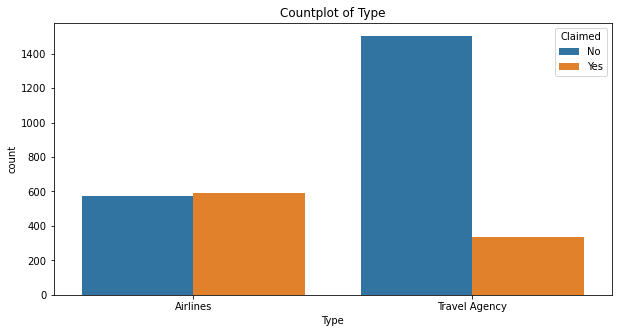

In [24]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Type')
sns.countplot(x='Type',hue='Claimed',data=df2)

<AxesSubplot:title={'center':'Countplot of Channel'}, xlabel='Channel', ylabel='count'>

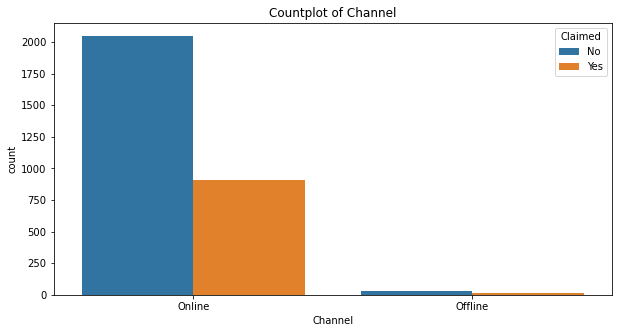

In [25]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Channel')
sns.countplot(x='Channel',hue='Claimed',data=df2)

<AxesSubplot:title={'center':'Countplot of Product Name'}, xlabel='Product Name', ylabel='count'>

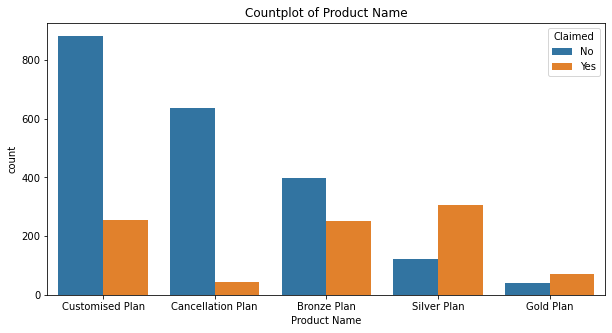

In [26]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Product Name')
sns.countplot(x='Product Name',hue='Claimed',data=df2)

<AxesSubplot:title={'center':'Countplot of Destination'}, xlabel='Destination', ylabel='count'>

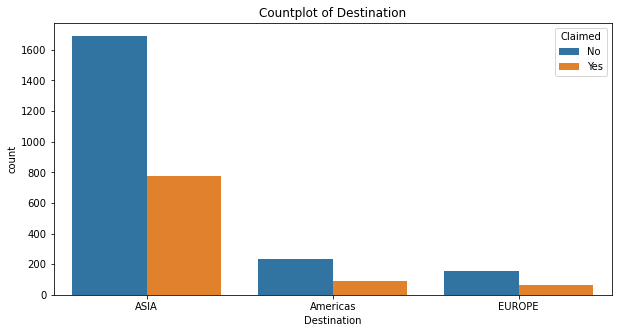

In [27]:
plt.figure(figsize=(10,5))
plt.title('Countplot of Destination')
sns.countplot(x='Destination',hue='Claimed',data=df2)

Multivariate Analysis

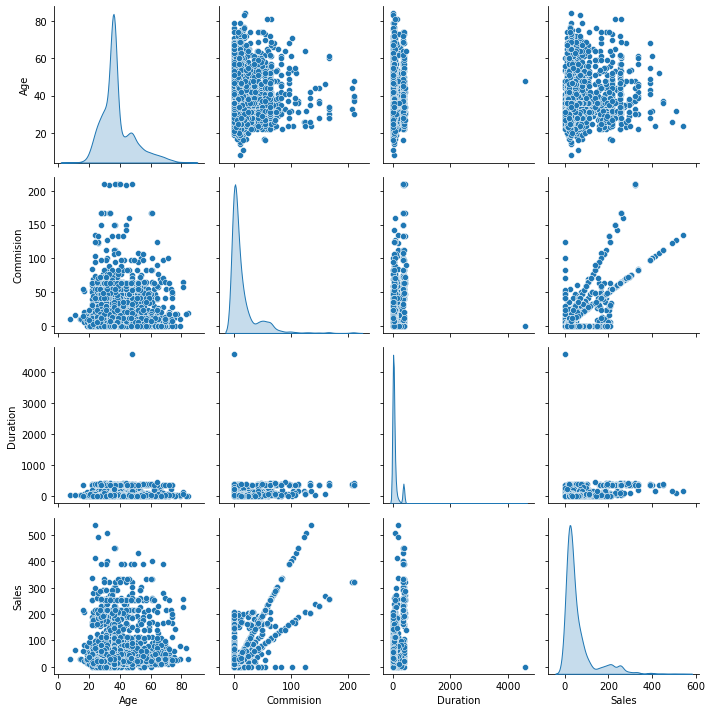

In [28]:
sns.pairplot(df2, diag_kind='kde')
plt.tight_layout()

<AxesSubplot:title={'center':'Boxplot of Agency_code'}, xlabel='Agency_Code', ylabel='Sales'>

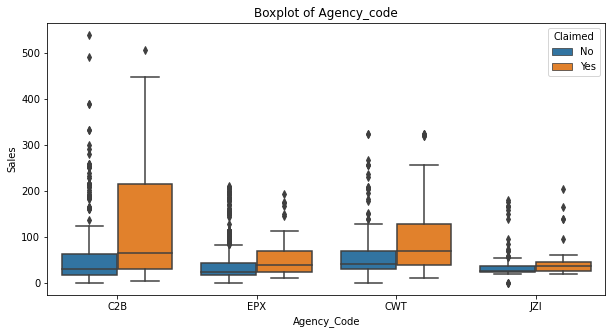

In [29]:
plt.figure(figsize=(10,5))
plt.title('Boxplot of Agency_code')
sns.boxplot(data = df2, x='Agency_Code',y='Sales', hue='Claimed')

<AxesSubplot:title={'center':'Boxplot of Type'}, xlabel='Type', ylabel='Sales'>

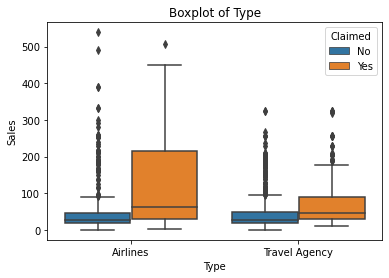

In [30]:
plt.title('Boxplot of Type')
sns.boxplot(data = df2, x='Type',y='Sales', hue='Claimed')

<AxesSubplot:title={'center':'Boxplot of Claimed'}, xlabel='Claimed', ylabel='Sales'>

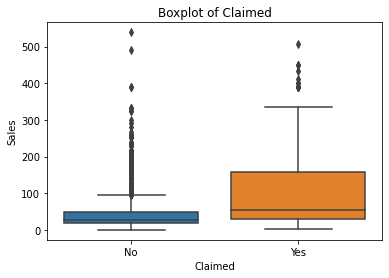

In [31]:
plt.title('Boxplot of Claimed')
sns.boxplot(data = df2, x='Claimed',y='Sales')

<AxesSubplot:title={'center':'Boxplot of Channel'}, xlabel='Channel', ylabel='Sales'>

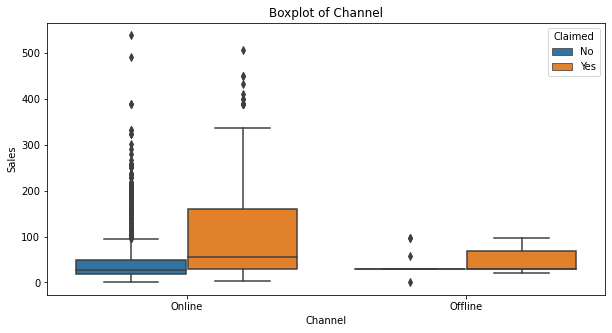

In [32]:
plt.figure(figsize=(10,5))
plt.title('Boxplot of Channel')
sns.boxplot(data = df2, x='Channel',y='Sales', hue='Claimed')

<AxesSubplot:title={'center':'Boxplot of Product Name'}, xlabel='Product Name', ylabel='Sales'>

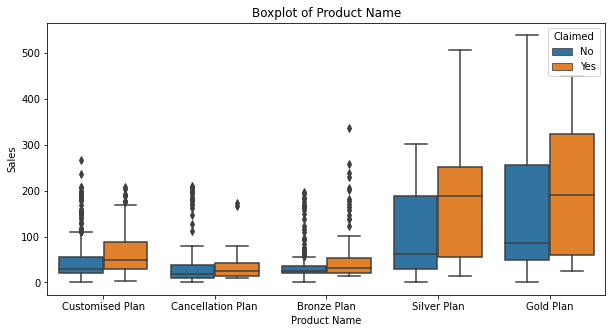

In [33]:
plt.figure(figsize=(10,5))
plt.title('Boxplot of Product Name')
sns.boxplot(data = df2, x='Product Name',y='Sales', hue='Claimed')

<AxesSubplot:title={'center':'Boxplot of Destination'}, xlabel='Destination', ylabel='Sales'>

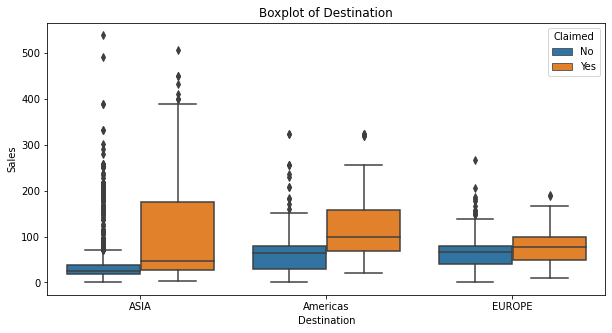

In [34]:
plt.figure(figsize=(10,5))
plt.title('Boxplot of Destination')
sns.boxplot(data = df2, x='Destination',y='Sales', hue='Claimed')

In [35]:
for feature in df2.columns:
    if df2[feature].dtype == 'object':
        df2[feature] = pd.Categorical(df2[feature]).codes

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [37]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [38]:
df2.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network


In [39]:
X = df2.drop("Claimed", axis=1)
y = df2.pop("Claimed")

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [41]:
from scipy.stats import zscore
df2_scaled=df2.apply(zscore)
df2_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


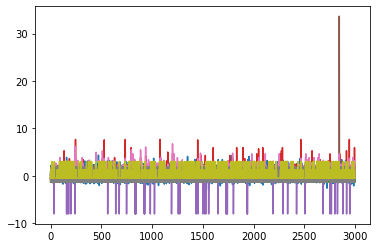

In [42]:
plt.plot(df2_scaled)
plt.show()

In [43]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


Descision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [47]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [49]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [100, 120, 140, 150],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [50]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 140}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=140,
                       random_state=1)

In [51]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [10, 15, 20, 25], 
    'min_samples_split': [130, 135, 140, 145, 150],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [52]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 140}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=140,
                       random_state=1)

In [53]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [18, 19, 20, 21, 22], 
    'min_samples_split': [138, 139, 140, 141, 142],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [54]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 139}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=19, min_samples_split=139,
                       random_state=1)

In [56]:
from sklearn import tree

In [58]:
train_char_label = ['No', 'Yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [59]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.561444
Sales         0.247335
Product Name  0.071714
Age           0.046122
Duration      0.045311
Commision     0.021128
Type          0.006946
Channel       0.000000
Destination   0.000000


In [60]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

In [61]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.983333,0.016667
1,0.555556,0.444444
2,0.292035,0.707965
3,0.196078,0.803922
4,0.909774,0.090226


Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
param_grid_rfcl = { 'max_depth': [5,10,15],
                   'max_features': [4,5,6,7],
                   'min_samples_leaf': [10,50,70],
                   'min_samples_split': [30,50,70], 
                   'n_estimators': [200,250,300]}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [69]:
grid_search_rfcl.fit(X_train, train_labels) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

{'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 300}


RandomForestClassifier(max_depth=15, max_features=6, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=300, random_state=1)

In [70]:
param_grid_rfcl = { 'max_depth': [14, 15, 20],
                   'max_features': [4,5,6,7],
                   'min_samples_leaf': [5, 10, 15],
                   'min_samples_split': [20, 30, 35], 
                   'n_estimators': [290, 300, 350]}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [71]:
grid_search_rfcl.fit(X_train, train_labels) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

{'max_depth': 14, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 35, 'n_estimators': 300}


RandomForestClassifier(max_depth=14, max_features=4, min_samples_leaf=5,
                       min_samples_split=35, n_estimators=300, random_state=1)

In [72]:
param_grid_rfcl = { 'max_depth': [10, 12, 14, 15],
                   'max_features': [2,3,4,5,6],
                   'min_samples_leaf': [3, 5, 10],
                   'min_samples_split': [25, 30, 35], 
                   'n_estimators': [290, 300, 320]}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [83]:
grid_search_rfcl.fit(X_train, train_labels) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 25, 'n_estimators': 300}


RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=3,
                       min_samples_split=25, n_estimators=300, random_state=1)

In [160]:
param_grid_rfcl = { 'max_depth': [5, 10, 12],
                   'max_features': [2,3,4],
                   'min_samples_leaf': [3, 5, 10],
                   'min_samples_split': [20, 25, 30, 35], 
                   'n_estimators': [290, 300, 320]}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [161]:
grid_search_rfcl.fit(X_train, train_labels) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 25, 'n_estimators': 300}


RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=3,
                       min_samples_split=25, n_estimators=300, random_state=1)

In [165]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.214320
Sales         0.182379
Product Name  0.177333
Commision     0.142495
Duration      0.121317
Age           0.085214
Type          0.056292
Destination   0.015263
Channel       0.005386


In [162]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [163]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.773651,0.226349
1,0.463649,0.536351
2,0.416801,0.583199
3,0.252048,0.747952
4,0.959486,0.040514


Artificial Neural Network

In [176]:
from sklearn.neural_network import MLPClassifier

In [187]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [200,300,500],
    'solver': ['adam','sgd'],
    'tol': [0.1,0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [188]:
grid_search_nncl.fit(X_train, train_labels)
print(grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

{'hidden_layer_sizes': 100, 'max_iter': 200, 'solver': 'adam', 'tol': 0.01}


MLPClassifier(hidden_layer_sizes=100, random_state=1, tol=0.01)

In [193]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [50,100,150,200],
    'solver': ['adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [194]:
grid_search_nncl.fit(X_train, train_labels)
print(grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

{'hidden_layer_sizes': 100, 'max_iter': 50, 'solver': 'adam', 'tol': 0.01}


MLPClassifier(hidden_layer_sizes=100, max_iter=50, random_state=1, tol=0.01)

In [197]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [40,50,60],
    'solver': ['adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [198]:
grid_search_nncl.fit(X_train, train_labels)
print(grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

{'hidden_layer_sizes': 100, 'max_iter': 40, 'solver': 'adam', 'tol': 0.01}


MLPClassifier(hidden_layer_sizes=100, max_iter=40, random_state=1, tol=0.01)

In [203]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [40,50,60,70],
    'solver': ['adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [204]:
grid_search_nncl.fit(X_train, train_labels)
print(grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

{'hidden_layer_sizes': 100, 'max_iter': 40, 'solver': 'adam', 'tol': 0.01}


MLPClassifier(hidden_layer_sizes=100, max_iter=40, random_state=1, tol=0.01)

In [206]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

In [207]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.617672,0.382328
1,0.690120,0.309880
2,0.538041,0.461959
3,0.237722,0.762278
4,0.817804,0.182196


2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 


In [213]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

Decision Tree Classifier

AUC and ROC for the training data

AUC: 0.845


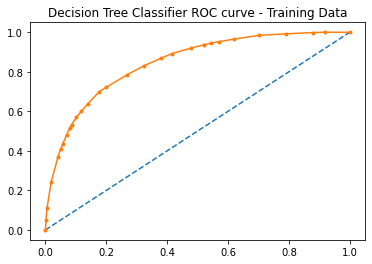

In [262]:
probs_dtcl = best_grid_dtcl.predict_proba(X_train)
probs_dtcl = probs_dtcl[:, 1]
dtcl_train_auc = roc_auc_score(train_labels, probs_dtcl)
print('AUC: %.3f' % dtcl_train_auc)
dtcl_train_fpr, dtcl_train_tpr, dtcl_train_thresholds = roc_curve(train_labels, probs_dtcl)
plt.title('Decision Tree Classifier ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_train_fpr, dtcl_train_tpr, marker='.')
plt.show()

AUC and ROC for the test data

AUC: 0.796


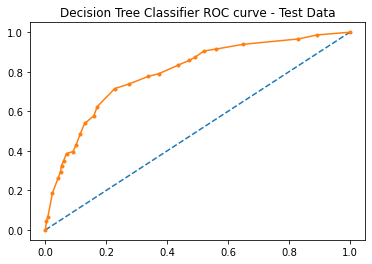

In [263]:
probs_dtcl = best_grid_dtcl.predict_proba(X_test)
probs_dtcl = probs_dtcl[:, 1]
dtcl_test_auc = roc_auc_score(test_labels, probs_dtcl)
print('AUC: %.3f' % dtcl_test_auc)
dtcl_test_fpr, dtcl_test_tpr, dtcl_test_thresholds = roc_curve(test_labels, probs_dtcl)
plt.title('Decision Tree Classifier ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_test_fpr, dtcl_test_tpr, marker='.')
plt.show()

Confusion Matrix and Classification Report for the training data

In [214]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1322,  149],
       [ 271,  358]], dtype=int64)

In [215]:
dtcl_train_acc=best_grid_dtcl.score(X_train,train_labels) 
dtcl_train_acc

0.8

In [216]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.75      2100
weighted avg       0.79      0.80      0.79      2100



Confusion Matrix and Classification Report for the test data

In [217]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[544,  61],
       [168, 127]], dtype=int64)

In [218]:
dtcl_test_acc=best_grid_dtcl.score(X_test,test_labels)
dtcl_test_acc

0.7455555555555555

In [219]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       605
           1       0.68      0.43      0.53       295

    accuracy                           0.75       900
   macro avg       0.72      0.66      0.68       900
weighted avg       0.74      0.75      0.73       900



Random Forest Classifier

AUC and ROC for the training data

AUC: 0.896


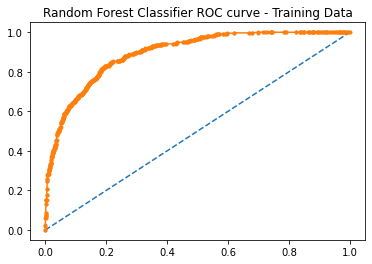

In [264]:
probs_rfcl = best_grid_rfcl.predict_proba(X_train)
probs_rfcl = probs_rfcl[:, 1]
rfcl_train_auc = roc_auc_score(train_labels, probs_rfcl)
print('AUC: %.3f' % rfcl_train_auc)
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(train_labels, probs_rfcl)
plt.title('Random Forest Classifier ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_train_fpr, rfcl_train_tpr, marker='.')
plt.show()

AUC and ROC for the test data

AUC: 0.825


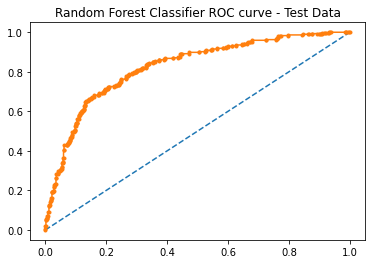

In [265]:
probs_rfcl = best_grid_rfcl.predict_proba(X_test)
probs_rfcl = probs_rfcl[:, 1]
rfcl_test_auc = roc_auc_score(test_labels, probs_rfcl)
print('AUC: %.3f' % rfcl_test_auc)
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(test_labels, probs_rfcl)
plt.title('Random Forest Classifier ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_test_fpr, rfcl_test_tpr, marker='.')
plt.show()

Confusion Matrix and Classification Report for the training data

In [272]:
confusion_matrix(train_labels, ytrain_predict_rfcl)

array([[1347,  124],
       [ 231,  398]], dtype=int64)

In [231]:
rfcl_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rfcl_train_acc

0.830952380952381

In [232]:
print(classification_report(train_labels, ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.63      0.69       629

    accuracy                           0.83      2100
   macro avg       0.81      0.77      0.79      2100
weighted avg       0.83      0.83      0.83      2100



Confusion Matrix and Classification Report for the test data

In [233]:
confusion_matrix(test_labels, ytest_predict_rfcl)

array([[552,  53],
       [149, 146]], dtype=int64)

In [234]:
rfcl_test_acc=best_grid_rfcl.score(X_test,test_labels)
rfcl_test_acc

0.7755555555555556

In [235]:
print(classification_report(test_labels, ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       605
           1       0.73      0.49      0.59       295

    accuracy                           0.78       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.78      0.76       900



Artificial Neural Network

AUC and ROC for the training data

AUC: 0.816


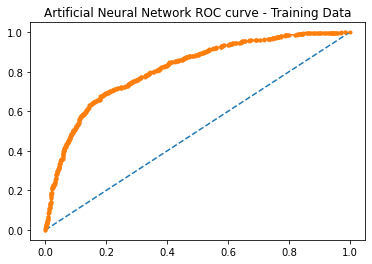

In [281]:
probs_nncl = best_grid_nncl.predict_proba(X_train)
probs_nncl = probs_nncl[:, 1]
nncl_train_auc = roc_auc_score(train_labels, probs_nncl)
print('AUC: %.3f' % nncl_train_auc)
nncl_train_fpr, nncl_train_tpr, nncl_train_thresholds = roc_curve(train_labels, probs_nncl)
plt.title('Artificial Neural Network ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nncl_train_fpr, nncl_train_tpr, marker='.')
plt.show()

AUC and ROC for the test data

AUC: 0.783


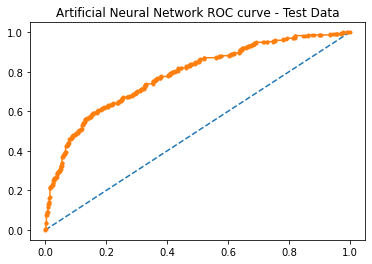

In [282]:
probs_nncl = best_grid_nncl.predict_proba(X_test)
probs_nncl = probs_nncl[:, 1]
nncl_test_auc = roc_auc_score(test_labels, probs_nncl)
print('AUC: %.3f' % nncl_test_auc)
nncl_test_fpr, nncl_test_tpr, nncl_test_thresholds = roc_curve(test_labels, probs_nncl)
plt.title('Artificial Neural Network ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nncl_test_fpr, nncl_test_tpr, marker='.')
plt.show()

Confusion Matrix and Classification Report for the training data

In [238]:
confusion_matrix(train_labels, ytrain_predict_nncl)

array([[1289,  182],
       [ 262,  367]], dtype=int64)

In [239]:
nncl_train_acc=best_grid_nncl.score(X_train,train_labels) 
nncl_train_acc

0.7885714285714286

In [240]:
print(classification_report(train_labels, ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



Confusion Matrix and Classification Report for the test data

In [241]:
confusion_matrix(test_labels, ytest_predict_nncl)

array([[547,  58],
       [154, 141]], dtype=int64)

In [242]:
nncl_test_acc=best_grid_nncl.score(X_test,test_labels)
nncl_test_acc

0.7644444444444445

In [243]:
print(classification_report(test_labels, ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



2.4 Final Model: Compare all the models and write an inference which model is best/optimized.


In [250]:
dtcl_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(dtcl_metrics).transpose()
dtcl_train_f1=round(df.loc["1"][2],2)
dtcl_train_recall=round(df.loc["1"][1],2)
dtcl_train_precision=round(df.loc["1"][0],2)
print ('dtcl_train_precision ',dtcl_train_precision)
print ('dtcl_train_recall ',dtcl_train_recall)
print ('dtcl_train_f1 ',dtcl_train_f1)
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(dtcl_metrics).transpose()
dtcl_test_precision=round(df.loc["1"][0],2)
dtcl_test_recall=round(df.loc["1"][1],2)
dtcl_test_f1=round(df.loc["1"][2],2)
print ('dtcl_test_precision ',dtcl_test_precision)
print ('dtcl_test_recall ',dtcl_test_recall)
print ('dtcl_test_f1 ',dtcl_test_f1)

dtcl_train_precision  0.71
dtcl_train_recall  0.57
dtcl_train_f1  0.63
dtcl_test_precision  0.71
dtcl_test_recall  0.57
dtcl_test_f1  0.63


In [251]:
rfcl_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_precision=round(df.loc["1"][0],2)
rfcl_train_recall=round(df.loc["1"][1],2)
rfcl_train_f1=round(df.loc["1"][2],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)
rfcl_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_test_precision=round(df.loc["1"][0],2)
rfcl_test_recall=round(df.loc["1"][1],2)
rfcl_test_f1=round(df.loc["1"][2],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

rfcl_train_precision  0.76
rfcl_train_recall  0.63
rfcl_train_f1  0.69
rfcl_test_precision  0.73
rfcl_test_recall  0.49
rfcl_test_f1  0.59


In [252]:
nncl_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nncl_metrics).transpose()
nncl_train_precision=round(df.loc["1"][0],2)
nncl_train_recall=round(df.loc["1"][1],2)
nncl_train_f1=round(df.loc["1"][2],2)
print ('nncl_train_precision ',nncl_train_precision)
print ('nncl_train_recall ',nncl_train_recall)
print ('nncl_train_f1 ',nncl_train_f1)
nncl_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nncl_metrics).transpose()
nncl_test_precision=round(df.loc["1"][0],2)
nncl_test_recall=round(df.loc["1"][1],2)
nncl_test_f1=round(df.loc["1"][2],2)
print ('nncl_test_precision ',nncl_test_precision)
print ('nncl_test_recall ',nncl_test_recall)
print ('nncl_test_f1 ',nncl_test_f1)

nncl_train_precision  0.67
nncl_train_recall  0.58
nncl_train_f1  0.62
nncl_test_precision  0.71
nncl_test_recall  0.48
nncl_test_f1  0.57


In [275]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Decision Tree Train':[dtcl_train_acc,dtcl_train_auc,dtcl_train_recall,dtcl_train_precision,dtcl_train_f1],
        'Decision Tree Test':[dtcl_test_acc,dtcl_test_auc,dtcl_test_recall,dtcl_test_precision,dtcl_test_f1],
       'Random Forest Train':[rfcl_train_acc,rfcl_train_auc,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'Random Forest Test':[rfcl_test_acc,rfcl_test_auc,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
       'Neural Network Train':[nncl_train_acc,nncl_train_auc,nncl_train_recall,nncl_train_precision,nncl_train_f1],
        'Neural Network Test':[nncl_test_acc,nncl_test_auc,nncl_test_recall,nncl_test_precision,nncl_test_f1]},index=index)
round(data,3)

,Decision Tree Train,Decision Tree Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.800,0.746,0.831,0.776,0.789,0.764
AUC,0.845,0.796,0.896,0.825,0.816,0.783
Recall,0.570,0.570,0.630,0.490,0.580,0.480
Precision,0.710,0.710,0.760,0.730,0.670,0.710
F1 Score,0.630,0.630,0.690,0.590,0.620,0.570


ROC curve for the 3 models on training data 

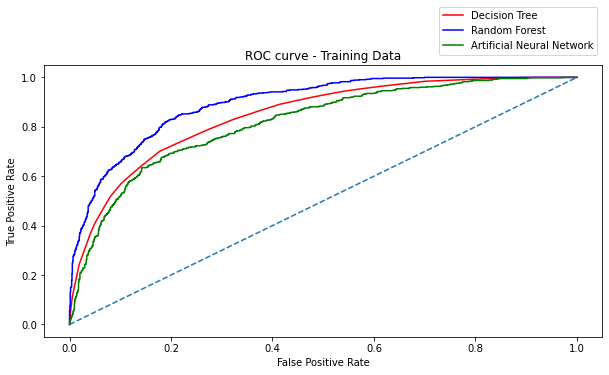

In [270]:
plt.figure(figsize=(10,5))
plt.title('ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_train_fpr, dtcl_train_tpr,color='red',label="Decision Tree")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='blue',label="Random Forest")
plt.plot(nncl_train_fpr,nncl_train_tpr,color='green',label="Artificial Neural Network")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC curve for the 3 models on test data 

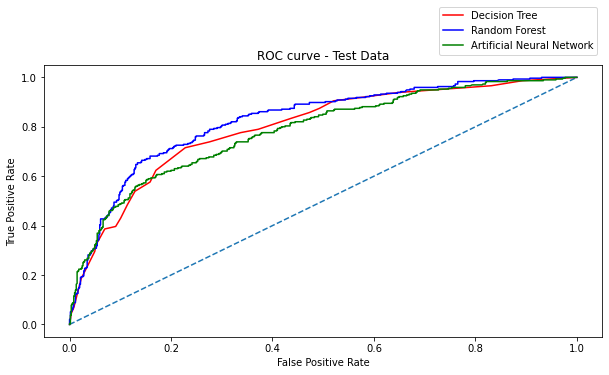

In [271]:
plt.figure(figsize=(10,5))
plt.title('ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_test_fpr, dtcl_test_tpr,color='red',label="Decision Tree")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='blue',label="Random Forest")
plt.plot(nncl_test_fpr,nncl_test_tpr,color='green',label="Artificial Neural Network")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations



In [ ]:
Problem 2: CART-RF-ANN


An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

df2 = pd.read_csv('insurance_part2_data.csv')

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).


df2.head()

df2.info()

df2.dtypes

df2.shape

df2.isnull().sum()

df2.describe()

Univariate Analysis

def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df2[column], kde=True);
    plt.title("Distribution of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column], orient = "v")
    plt.title("Boxplot of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax1 = plt.hist(x=df2[column])
    plt.title("Histogram of " + column,fontsize=10)
    plt.xlabel("" + column, fontsize=10)
    plt.show()

df2_num = df2.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns2 = list(df2_num.columns.values)
len(lstnumericcolumns2)

df2_num.head()

Skewness_2 = pd.DataFrame({'Skewness' : [stats.skew(df2.Age),stats.skew(df2.Commision),stats.skew(df2.Duration),stats.skew(df2.Sales)]},
                        index=['Age','Commision','Duration','Sales']) 

Skewness_2

for x in lstnumericcolumns2:
    univariateAnalysis_numeric(x,4)

plt.title('Countplot of Agency_code')
sns.countplot(data = df2, x = 'Agency_Code')

plt.title('Countplot of Type')
sns.countplot(data = df2, x = 'Type')

plt.title('Countplot of Claimed')
sns.countplot(data = df2, x = 'Claimed')

plt.title('Countplot of Channel')
sns.countplot(data = df2, x = 'Channel')

plt.figure(figsize=(10,5))
plt.title('Countplot of Product Name')
sns.countplot(data = df2, x = 'Product Name')

plt.title('Countplot of Destination')
sns.countplot(data = df2, x = 'Destination')

Bivariate Analysis

corr2 = df2_num.corr(method='pearson')
corr2

plt.figure(figsize=(10,8))
sns.heatmap(corr2, annot=True, fmt = '.2f', cmap = 'Blues')

plt.figure(figsize=(10,5))
plt.title('Countplot of Agency_code')
sns.countplot(x='Agency_Code',hue='Claimed',data=df2)

plt.figure(figsize=(10,5))
plt.title('Countplot of Type')
sns.countplot(x='Type',hue='Claimed',data=df2)

plt.figure(figsize=(10,5))
plt.title('Countplot of Channel')
sns.countplot(x='Channel',hue='Claimed',data=df2)

plt.figure(figsize=(10,5))
plt.title('Countplot of Product Name')
sns.countplot(x='Product Name',hue='Claimed',data=df2)

plt.figure(figsize=(10,5))
plt.title('Countplot of Destination')
sns.countplot(x='Destination',hue='Claimed',data=df2)

Multivariate Analysis

sns.pairplot(df2, diag_kind='kde')
plt.tight_layout()

plt.figure(figsize=(10,5))
plt.title('Boxplot of Agency_code')
sns.boxplot(data = df2, x='Agency_Code',y='Sales', hue='Claimed')

plt.title('Boxplot of Type')
sns.boxplot(data = df2, x='Type',y='Sales', hue='Claimed')

plt.title('Boxplot of Claimed')
sns.boxplot(data = df2, x='Claimed',y='Sales')

plt.figure(figsize=(10,5))
plt.title('Boxplot of Channel')
sns.boxplot(data = df2, x='Channel',y='Sales', hue='Claimed')

plt.figure(figsize=(10,5))
plt.title('Boxplot of Product Name')
sns.boxplot(data = df2, x='Product Name',y='Sales', hue='Claimed')

plt.figure(figsize=(10,5))
plt.title('Boxplot of Destination')
sns.boxplot(data = df2, x='Destination',y='Sales', hue='Claimed')

for feature in df2.columns:
    if df2[feature].dtype == 'object':
        df2[feature] = pd.Categorical(df2[feature]).codes

df2.info()

df2.head()

df2.Claimed.value_counts(normalize=True)

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network


X = df2.drop("Claimed", axis=1)
y = df2.pop("Claimed")

from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

from scipy.stats import zscore
df2_scaled=df2.apply(zscore)
df2_scaled.head()

plt.plot(df2_scaled)
plt.show()

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

Descision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [100, 120, 140, 150],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [10, 15, 20, 25], 
    'min_samples_split': [130, 135, 140, 145, 150],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [18, 19, 20, 21, 22], 
    'min_samples_split': [138, 139, 140, 141, 142],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

from sklearn import tree

train_char_label = ['No', 'Yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

param_grid_rfcl = { 'max_depth': [5,10,15],
                   'max_features': [4,5,6,7],
                   'min_samples_leaf': [10,50,70],
                   'min_samples_split': [30,50,70], 
                   'n_estimators': [200,250,300]}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

grid_search_rfcl.fit(X_train, train_labels) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

param_grid_rfcl = { 'max_depth': [14, 15, 20],
                   'max_features': [4,5,6,7],
                   'min_samples_leaf': [5, 10, 15],
                   'min_samples_split': [20, 30, 35], 
                   'n_estimators': [290, 300, 350]}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

grid_search_rfcl.fit(X_train, train_labels) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

param_grid_rfcl = { 'max_depth': [10, 12, 14, 15],
                   'max_features': [2,3,4,5,6],
                   'min_samples_leaf': [3, 5, 10],
                   'min_samples_split': [25, 30, 35], 
                   'n_estimators': [290, 300, 320]}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

grid_search_rfcl.fit(X_train, train_labels) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

param_grid_rfcl = { 'max_depth': [5, 10, 12],
                   'max_features': [2,3,4],
                   'min_samples_leaf': [3, 5, 10],
                   'min_samples_split': [20, 25, 30, 35], 
                   'n_estimators': [290, 300, 320]}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

grid_search_rfcl.fit(X_train, train_labels) 
print(grid_search_rfcl.best_params_) 
best_grid_rfcl = grid_search_rfcl.best_estimator_ 
best_grid_rfcl

print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

Artificial Neural Network

from sklearn.neural_network import MLPClassifier

param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [200,300,500],
    'solver': ['adam','sgd'],
    'tol': [0.1,0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

grid_search_nncl.fit(X_train, train_labels)
print(grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [50,100,150,200],
    'solver': ['adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

grid_search_nncl.fit(X_train, train_labels)
print(grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [40,50,60],
    'solver': ['adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

grid_search_nncl.fit(X_train, train_labels)
print(grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [40,50,60,70],
    'solver': ['adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

grid_search_nncl.fit(X_train, train_labels)
print(grid_search_nncl.best_params_)
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 


from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

Decision Tree Classifier

AUC and ROC for the training data

probs_dtcl = best_grid_dtcl.predict_proba(X_train)
probs_dtcl = probs_dtcl[:, 1]
dtcl_train_auc = roc_auc_score(train_labels, probs_dtcl)
print('AUC: %.3f' % dtcl_train_auc)
dtcl_train_fpr, dtcl_train_tpr, dtcl_train_thresholds = roc_curve(train_labels, probs_dtcl)
plt.title('Decision Tree Classifier ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_train_fpr, dtcl_train_tpr, marker='.')
plt.show()

AUC and ROC for the test data

probs_dtcl = best_grid_dtcl.predict_proba(X_test)
probs_dtcl = probs_dtcl[:, 1]
dtcl_test_auc = roc_auc_score(test_labels, probs_dtcl)
print('AUC: %.3f' % dtcl_test_auc)
dtcl_test_fpr, dtcl_test_tpr, dtcl_test_thresholds = roc_curve(test_labels, probs_dtcl)
plt.title('Decision Tree Classifier ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_test_fpr, dtcl_test_tpr, marker='.')
plt.show()

Confusion Matrix and Classification Report for the training data

confusion_matrix(train_labels, ytrain_predict_dtcl)

dtcl_train_acc=best_grid_dtcl.score(X_train,train_labels) 
dtcl_train_acc

print(classification_report(train_labels, ytrain_predict_dtcl))

Confusion Matrix and Classification Report for the test data

confusion_matrix(test_labels, ytest_predict_dtcl)

dtcl_test_acc=best_grid_dtcl.score(X_test,test_labels)
dtcl_test_acc

print(classification_report(test_labels, ytest_predict_dtcl))

Random Forest Classifier

AUC and ROC for the training data

probs_rfcl = best_grid_rfcl.predict_proba(X_train)
probs_rfcl = probs_rfcl[:, 1]
rfcl_train_auc = roc_auc_score(train_labels, probs_rfcl)
print('AUC: %.3f' % rfcl_train_auc)
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(train_labels, probs_rfcl)
plt.title('Random Forest Classifier ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_train_fpr, rfcl_train_tpr, marker='.')
plt.show()

AUC and ROC for the test data

probs_rfcl = best_grid_rfcl.predict_proba(X_test)
probs_rfcl = probs_rfcl[:, 1]
rfcl_test_auc = roc_auc_score(test_labels, probs_rfcl)
print('AUC: %.3f' % rfcl_test_auc)
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(test_labels, probs_rfcl)
plt.title('Random Forest Classifier ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rfcl_test_fpr, rfcl_test_tpr, marker='.')
plt.show()

Confusion Matrix and Classification Report for the training data

confusion_matrix(train_labels, ytrain_predict_rfcl)

rfcl_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rfcl_train_acc

print(classification_report(train_labels, ytrain_predict_rfcl))

Confusion Matrix and Classification Report for the test data

confusion_matrix(test_labels, ytest_predict_rfcl)

rfcl_test_acc=best_grid_rfcl.score(X_test,test_labels)
rfcl_test_acc

print(classification_report(test_labels, ytest_predict_rfcl))

Artificial Neural Network

AUC and ROC for the training data

probs_nncl = best_grid_nncl.predict_proba(X_train)
probs_nncl = probs_nncl[:, 1]
nncl_train_auc = roc_auc_score(train_labels, probs_nncl)
print('AUC: %.3f' % nncl_train_auc)
nncl_train_fpr, nncl_train_tpr, nncl_train_thresholds = roc_curve(train_labels, probs_nncl)
plt.title('Artificial Neural Network ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nncl_train_fpr, nncl_train_tpr, marker='.')
plt.show()

AUC and ROC for the test data

probs_nncl = best_grid_nncl.predict_proba(X_test)
probs_nncl = probs_nncl[:, 1]
nncl_test_auc = roc_auc_score(test_labels, probs_nncl)
print('AUC: %.3f' % nncl_test_auc)
nncl_test_fpr, nncl_test_tpr, nncl_test_thresholds = roc_curve(test_labels, probs_nncl)
plt.title('Artificial Neural Network ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nncl_test_fpr, nncl_test_tpr, marker='.')
plt.show()

Confusion Matrix and Classification Report for the training data

confusion_matrix(train_labels, ytrain_predict_nncl)

nncl_train_acc=best_grid_nncl.score(X_train,train_labels) 
nncl_train_acc

print(classification_report(train_labels, ytrain_predict_nncl))

Confusion Matrix and Classification Report for the test data

confusion_matrix(test_labels, ytest_predict_nncl)

nncl_test_acc=best_grid_nncl.score(X_test,test_labels)
nncl_test_acc

print(classification_report(test_labels, ytest_predict_nncl))

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.


dtcl_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(dtcl_metrics).transpose()
dtcl_train_f1=round(df.loc["1"][2],2)
dtcl_train_recall=round(df.loc["1"][1],2)
dtcl_train_precision=round(df.loc["1"][0],2)
print ('dtcl_train_precision ',dtcl_train_precision)
print ('dtcl_train_recall ',dtcl_train_recall)
print ('dtcl_train_f1 ',dtcl_train_f1)
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(dtcl_metrics).transpose()
dtcl_test_precision=round(df.loc["1"][0],2)
dtcl_test_recall=round(df.loc["1"][1],2)
dtcl_test_f1=round(df.loc["1"][2],2)
print ('dtcl_test_precision ',dtcl_test_precision)
print ('dtcl_test_recall ',dtcl_test_recall)
print ('dtcl_test_f1 ',dtcl_test_f1)

rfcl_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_precision=round(df.loc["1"][0],2)
rfcl_train_recall=round(df.loc["1"][1],2)
rfcl_train_f1=round(df.loc["1"][2],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)
rfcl_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_test_precision=round(df.loc["1"][0],2)
rfcl_test_recall=round(df.loc["1"][1],2)
rfcl_test_f1=round(df.loc["1"][2],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

nncl_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nncl_metrics).transpose()
nncl_train_precision=round(df.loc["1"][0],2)
nncl_train_recall=round(df.loc["1"][1],2)
nncl_train_f1=round(df.loc["1"][2],2)
print ('nncl_train_precision ',nncl_train_precision)
print ('nncl_train_recall ',nncl_train_recall)
print ('nncl_train_f1 ',nncl_train_f1)
nncl_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nncl_metrics).transpose()
nncl_test_precision=round(df.loc["1"][0],2)
nncl_test_recall=round(df.loc["1"][1],2)
nncl_test_f1=round(df.loc["1"][2],2)
print ('nncl_test_precision ',nncl_test_precision)
print ('nncl_test_recall ',nncl_test_recall)
print ('nncl_test_f1 ',nncl_test_f1)

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Decision Tree Train':[dtcl_train_acc,dtcl_train_auc,dtcl_train_recall,dtcl_train_precision,dtcl_train_f1],
        'Decision Tree Test':[dtcl_test_acc,dtcl_test_auc,dtcl_test_recall,dtcl_test_precision,dtcl_test_f1],
       'Random Forest Train':[rfcl_train_acc,rfcl_train_auc,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'Random Forest Test':[rfcl_test_acc,rfcl_test_auc,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
       'Neural Network Train':[nncl_train_acc,nncl_train_auc,nncl_train_recall,nncl_train_precision,nncl_train_f1],
        'Neural Network Test':[nncl_test_acc,nncl_test_auc,nncl_test_recall,nncl_test_precision,nncl_test_f1]},index=index)
round(data,3)

ROC curve for the 3 models on training data 

plt.figure(figsize=(10,5))
plt.title('ROC curve - Training Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_train_fpr, dtcl_train_tpr,color='red',label="Decision Tree")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='blue',label="Random Forest")
plt.plot(nncl_train_fpr,nncl_train_tpr,color='green',label="Artificial Neural Network")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC curve for the 3 models on test data 

plt.figure(figsize=(10,5))
plt.title('ROC curve - Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_test_fpr, dtcl_test_tpr,color='red',label="Decision Tree")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='blue',label="Random Forest")
plt.plot(nncl_test_fpr,nncl_test_tpr,color='green',label="Artificial Neural Network")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations



